## pkl 파일로 저장된 생성 이미지 전처리

In [ ]:
import os
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Replace this path with your actual result_path directory
result_path = r'results/ffhq_stage2/logs_fid/valid/model_temp_1.0_top_k_2048_top_p_0.95/20062025_134632_3190329386'

# Find all sample pickle files
pkl_paths = sorted(glob.glob(os.path.join(result_path, 'samples_*.pkl')))
print("Found pickle files:", pkl_paths)

# Load and concatenate image batches
images = []
for pkl_file in pkl_paths:
    with open(pkl_file, 'rb') as f:
        batch = pickle.load(f)
    # If tensor, convert to numpy
    if hasattr(batch, 'cpu'):
        batch = batch.cpu().numpy()
    images.append(batch)
images = np.concatenate(images, axis=0)
print("Loaded images shape (N, C, H, W):", images.shape)

# Convert (N, C, H, W) to (N, H, W, C) if needed
if images.ndim == 4 and images.shape[1] in (1, 3):
    images = images.transpose(0, 2, 3, 1)

# Normalize if dtype is 0-255
if images.dtype == np.uint8 or images.max() > 1.0:
    images = images.astype(np.float32) / 255.0

## 생성된 이미지 랜덤 시각화

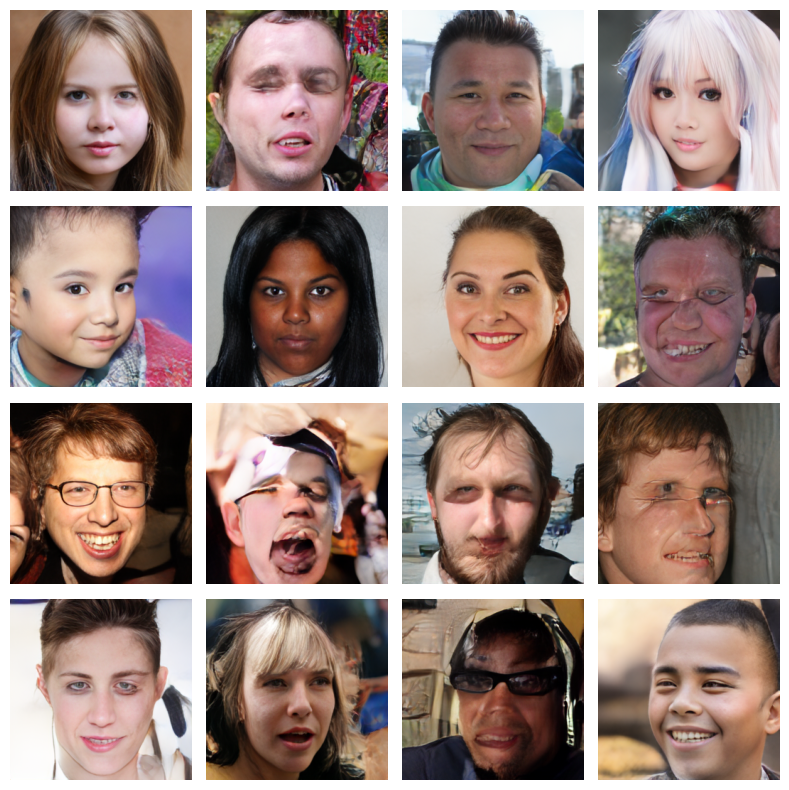

In [23]:
# 무작위로 16개 인덱스 추출
num_images = images.shape[0]
num_display = min(16, num_images)
# 시드를 고정하고 싶으면 np.random.seed(123) 등 추가 가능
indices = np.random.choice(num_images, size=num_display, replace=False)

# 4×4 그리드에 무작위 16장 그리기
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for ax, idx in zip(axes.flat, indices):
    ax.imshow(images[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()